# Machine Learning demo ( K-Nearest Neighbors )
### (Using scikit-learn, Python)

## The Scope
To train and test a Classification algorithm (K-Nearest Neighbors) to predict the quality of a red wine based in its physicochemical properties (features). For that I will use a data set gathered from http://archive.ics.uci.edu/ml/datasets/Wine+Quality in `.csv` format, also I will use some Python libraries such as `pandas`, `numpy`, `matplotlib` and  `sklearn`.

**Citation Request:**

Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## El Objetivo
Preparar y probar un algoritmo de Clasificación (K-Nearest Neighbors) para predecir la calidad de un vino tinto basándose en sus propiedades fisicoquímicas. Para ello usaré los datos obtenidos de http://archive.ics.uci.edu/ml/datasets/Wine+Quality en formato `.csv`, también usaré algunas librerías de Python como `pandas`, `numpy`, `matplotlib` y  `sklearn`.

**Cita Requerida:**
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

### (EN)
### Acquiring Data
* Downloading the files with the information

### Preparing Data
(Pandas, Matplotlib, Sklearn)
* Exploring data
* Sanity checks
* NaN or null values
* Standardize Data
* Split the data

### Classification Process
(Sklearn, Numpy)
* Train and Test
* Accuracy Evaluation

### *(ES)*
### *Adquisición de datos*
* *Descarga de archivos que contienen la información a tratar*

### *Acondicionamiento de Datos*
(Pandas, Matplotlib, Sklearn)
* *Exploración de los datos*
* *Revisiones de calidad de los datos*
* *NaN o valores nulos*
* *Normalización de valores*
* *Separación de los datos*

### *Proceso de Clasificación*
(Sklearn, Numpy)
* *Preparación y prueba*
* *Evaluación de la precisión*

---

### Acquaring Data
As mentioned, I will use a data set gathered from http://archive.ics.uci.edu/ml/datasets/Wine+Quality in `.csv` format.

**Citation Request:**

Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

### *Adquisición de datos*
*Tal como mencioné anteriormente, usaré los datos obtenidos de http://archive.ics.uci.edu/ml/datasets/Wine+Quality en formato `.csv`.*

***Cita Requerida:***
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

---


### Preparing Data
#### Exploring the data
Once the information is obtained, next step is to have an overall view of it, explore it and remove errors, empty fields (or fill them if the case), lack of information, null values, duplicate values and/or what is not right nor useful.

### *Acondicionar los datos*
#### *Exploración y limpieza de la información* 
*Una vez que la información es obtenida, es importante crear una visión general de la misma, explorarla y eliminar errores, campos vacíos (o completarlos si es el caso), faltas de información, valores nulos, valores duplicados y/o lo que no está bien ni es útil.*

In [1]:
# Modules to use along the code // Módulos a utilizar a lo largo del código.
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# (EN) First of all, let us load the Data.
# (ES) Lo primero es cargar la Data.

red_df = pd.read_csv('D:/ProgramData/Data Resources/winequality/winequality-red.csv', sep=';')

In [3]:
# (EN) Let us take a first look of it.
# (ES) Echemos un primer vistazo.

red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# (EN) Let's see how many rows, columns it has in total.
# (ES) Veamos cuántas filas, columnas tiene en total.

red_df.shape

(1599, 12)

In [5]:
# (EN) I like to have all the columns listed and shown so..
# (ES) Me gusta tener una lista visible de todas las columnas así que... 

red_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Sanity checks

#### *Otras revisiones de calidad*

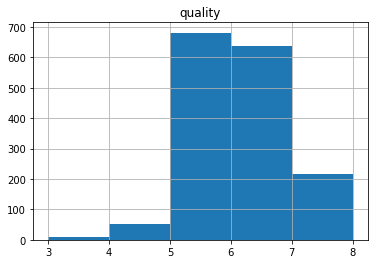

In [6]:
# (EN) Let's make a simple plot.
# (ES) Haré un gráfico sencillo.

red_df.hist(column='quality', bins=5)
plt.show()

**(EN)** As part of the sanity checks, I think that it is handy to take a look of some components of the data using a graphic plot. In this case, for example, I can quickly see that in what will be the "label" there are almost no values for 3 and 4. This means that the model might has accuracy troubles due to this "lack" of information, nevertheless, it should perform well on wines around the other values.

***(ES)*** *Como parte de las revisiones de calidad de los datos, me parece que es útil graficar algunos componentes de los datos. En este caso, por ejemplo, rápidamente puedo ver que en lo que serán "valores de calidad" en la clasificación, o "etiquetas", prácticamente no hay datos para los valores 3 y 4. Esto podría traducirse en problemas de exactitud del modelo a la hora de identificar/clasificar un vino con estos valores debido a la falta de información, sin embargo, debería comportarse bien prediciendo el resto de valores.*

In [7]:
# (EN) Let's get a brief statistic report.
# (ES) Veamos un reporte estadístico breve.

red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### NaN or null values
Let's take a look if there is any.

#### *NaN o valores nulos*
*Veamos si hay alguno.*

In [8]:
red_df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

#### Standardize Data
First of all I will asign to 'X' all the features that will be use as predictors, and to 'y' the lables information. Since there are different ranges of values within the records, it is a must to use a feature scaling method that fits all the 'X' values in the same range.

#### *Normalización de Valores*
*Antes que nada, asignaré a 'X' todas las características en las que se basará el modelo para hacer la clasificación, y a 'y' los valores reales de la escala de clasificación en cada caso. Debido a que hay distintos rangos de valores en los registros, se debe realizar un proceso de "escalado" que ubique a todos los valores de 'X' dentro del mismo rango.*

In [9]:
X = red_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values


y = red_df['quality'].values

print(X, y)

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

print(X)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]] [5 5 5 ... 6 5 6]
[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


#### Split the data
Now it is time to split the data into Train and Test subsets. This time, due to the "lack" of information mentioned earlier, I'm setting the size of the Test subset to be 10% of the total data in the parameter `test_size=0.10`.

#### *Separación de los datos*
*Ahora es el momento de separar los datos en dos subsets, una parte para la fase de entrenamiento del modelo, en la que se prepara el modelo para hacer clasificaciones; y otra parte para probar qué tan bien preparado quedó. En esta ocasión, debido a la "falta" de información mencionada anteriormente, he fijado el tamaño del subset para pruebas en el 10% del total de los datos, tal como se puede ver en el parámetro `test_size=0.10`.*

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1439, 11) (1439,)
Test set: (160, 11) (160,)


### Classification Process
#### Train and Test
Now it is time to run the model for Training and Testing process, defining a random-user value for 'k'.

### Proceso de Clasificación
#### *Preparación y prueba*
*Ahora es el momento de usar el modelo para el proceso de Preparación y Prueba, definiendo un valor al azar elegido por mí para 'k'.*

In [11]:
k = 2
 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(neigh)

y_pred = neigh.predict(X_test)
print(y_pred)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')
[5 6 5 6 5 5 6 5 5 5 5 5 5 5 7 5 6 5 6 6 5 5 6 5 5 5 3 6 5 6 5 6 5 6 5 5 6
 5 5 6 4 5 7 6 5 5 6 5 6 6 4 5 6 5 5 5 5 5 5 5 5 4 5 5 6 6 5 6 5 6 4 5 5 5
 6 4 6 5 6 6 6 4 5 6 5 5 5 5 5 5 6 6 5 5 5 5 5 5 5 7 5 5 7 6 6 5 4 5 4 7 6
 5 6 6 5 5 6 5 6 4 5 5 5 5 5 6 6 6 5 5 5 6 6 6 7 5 7 6 5 6 5 7 5 5 6 5 6 6
 7 5 5 4 6 5 5 6 4 6 5 5]
Train set Accuracy:  0.8234885337039611
Test set Accuracy:  0.7


#### Accuracy Evaluation
In the following code, I repeat the above process but inside a loop that test different 'k' values to see if there is someone with better performance, then I plot the results to easily compare each other.

#### *Evaluación de la precisión*
*En el código a continuación, repito el proceso anterior pero dentro de un loop que prueba diferentes valores de 'k' para ver si alguno se comporta mejor que otro, luego grafico los resultados para compararlos más fácilmente.*

In [12]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.7125 , 0.7    , 0.6625 , 0.6625 , 0.6625 , 0.63125, 0.60625,
       0.625  , 0.6125 ])

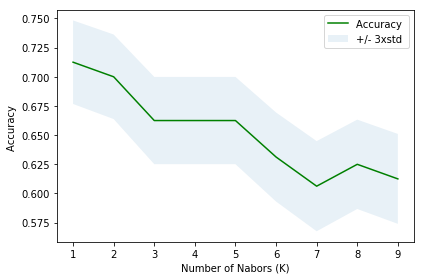

In [13]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()